# Completed
# Accuracy = 83.34%

<p id='2'><h3>DATASET COLUMNS FEATURE EXPLAIN</h3></p>
<ul>
    <li>Age (age in years)</li>
    <li>Sex (1 = male; 0 = female)</li>
    <li>CP (chest pain type)</li>
    <li>TRESTBPS (resting blood pressure (in mm Hg on admission to the hospital))</li>
    <li>CHOL (serum cholestoral in mg/dl)</li>
    <li>FPS (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)</li>
    <li>RESTECH (resting electrocardiographic results)</li>
    <li>THALACH (maximum heart rate achieved)</li>
    <li>EXANG (exercise induced angina (1 = yes; 0 = no))</li>
    <li>OLDPEAK (ST depression induced by exercise relative to rest)</li>
    <li>SLOPE (the slope of the peak exercise ST segment)</li>
    <li>CA (number of major vessels (0-3) colored by flourosopy)</li>
    <li>THAL (3 = normal; 6 = fixed defect; 7 = reversable defect)</li>
    <li>TARGET (1 or 0)</li>
 </ul>

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Imputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import os
import eli5
import shap


for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/opt/conda/lib/python3.6/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)
Using TensorFlow backend.


/kaggle/input/processed_cleveland.csv
/kaggle/input/heart.csv
/kaggle/input/processed_va.csv
/kaggle/input/processed_switzerland.csv


In [2]:
d1=pd.read_csv('/kaggle/input/heart.csv')
d2=pd.read_csv('/kaggle/input/processed_cleveland.csv')
d3=pd.read_csv('/kaggle/input/processed_va.csv')
d4=pd.read_csv('/kaggle/input/processed_switzerland.csv')

## Data exploration

In [3]:
#d2.astype('int32').dtypes
d2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
age         297 non-null int64
sex         297 non-null int64
cp          297 non-null int64
trestbps    297 non-null int64
chol        297 non-null int64
fbs         297 non-null int64
restecg     297 non-null int64
thalach     297 non-null int64
exang       297 non-null int64
oldpeak     297 non-null float64
slope       297 non-null int64
ca          297 non-null int64
thal        297 non-null int64
target      297 non-null int64
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


In [4]:
data=[]
data.append(d1)
data.append(d2)
#data.append(d3)
#data.append(d4)
data=pd.concat(data, ignore_index=True)

In [5]:
data.shape

(600, 14)

In [6]:
data.dropna(inplace=True)

In [7]:
data.shape

(600, 14)

In [8]:
data.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [9]:
data.fillna(data.mean(), inplace=True)
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [10]:
#data = data.apply(pd.to_numeric,errors='ignore')

In [11]:
#data = data.groupby(data.columns, axis = 1).transform(lambda x: x.fillna(x.mean()))

In [12]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [13]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [14]:
#all rows control for null values
data.isnull().values.any()

False

In [15]:
print('unique target', len(data.target.unique()))
print(data.target.unique())

unique target 5
[1 0 2 3 4]


In [16]:
data['target'] = data['target'].apply(lambda x:1 if x >= 1 else 0)

In [17]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,54.453333,0.680000,2.051667,131.658333,246.801667,0.146667,0.760000,149.623333,0.326667,1.047500,1.500000,0.703333,3.510000,0.503333
std,9.058951,0.466865,1.483014,17.635001,51.872893,0.354068,0.826764,22.904056,0.469386,1.162632,0.625021,0.981629,1.873254,0.500406
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,1.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,241.500000,0.000000,1.000000,153.000000,0.000000,0.800000,1.500000,0.000000,3.000000,1.000000
75%,61.000000,1.000000,3.000000,140.000000,275.000000,0.000000,1.250000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000,7.000000,1.000000


## visualisation

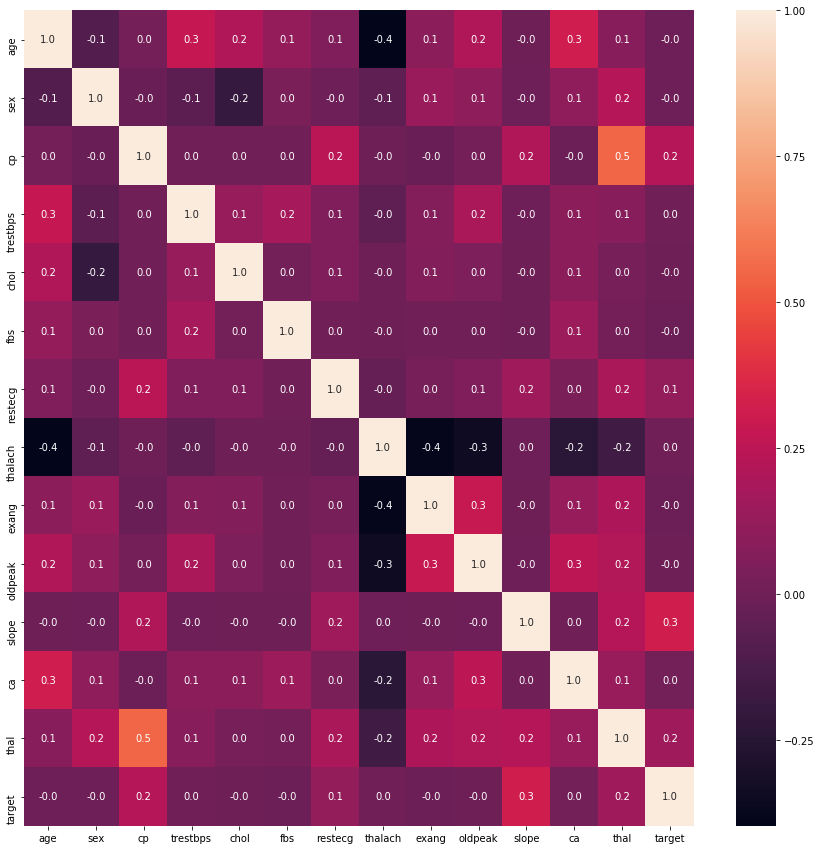

In [18]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(),annot=True,fmt='.1f') #corelation
plt.show()

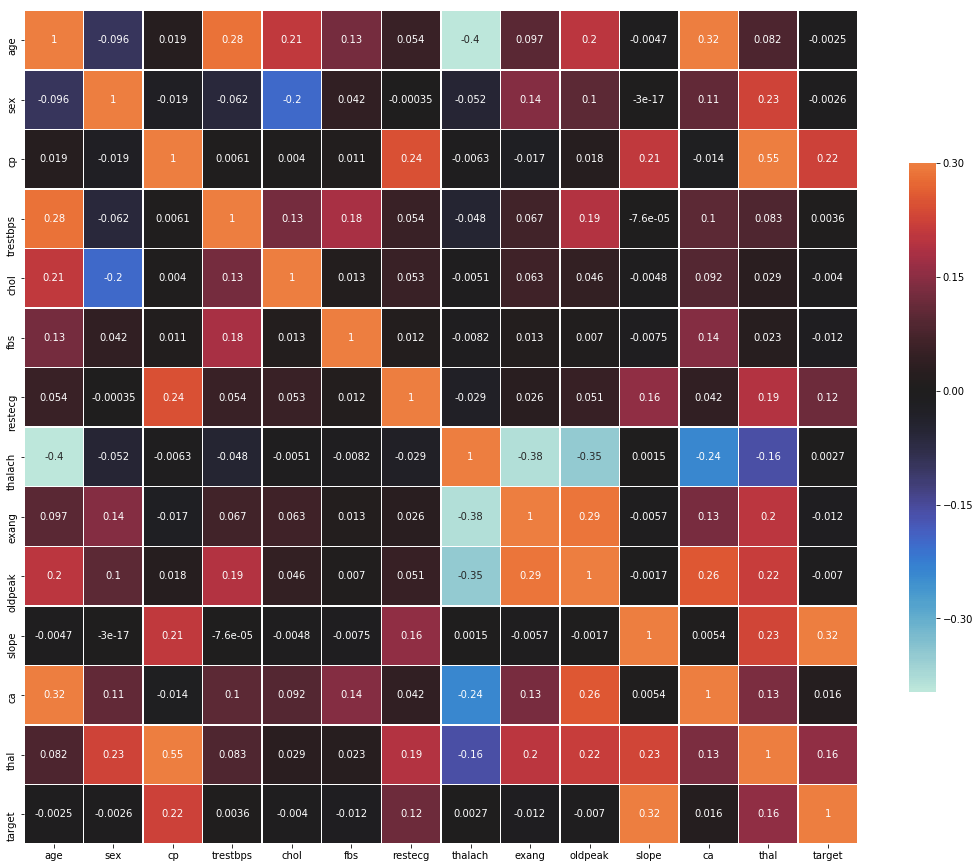

In [19]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(),vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot=True)
plt.tight_layout()
plt.show()

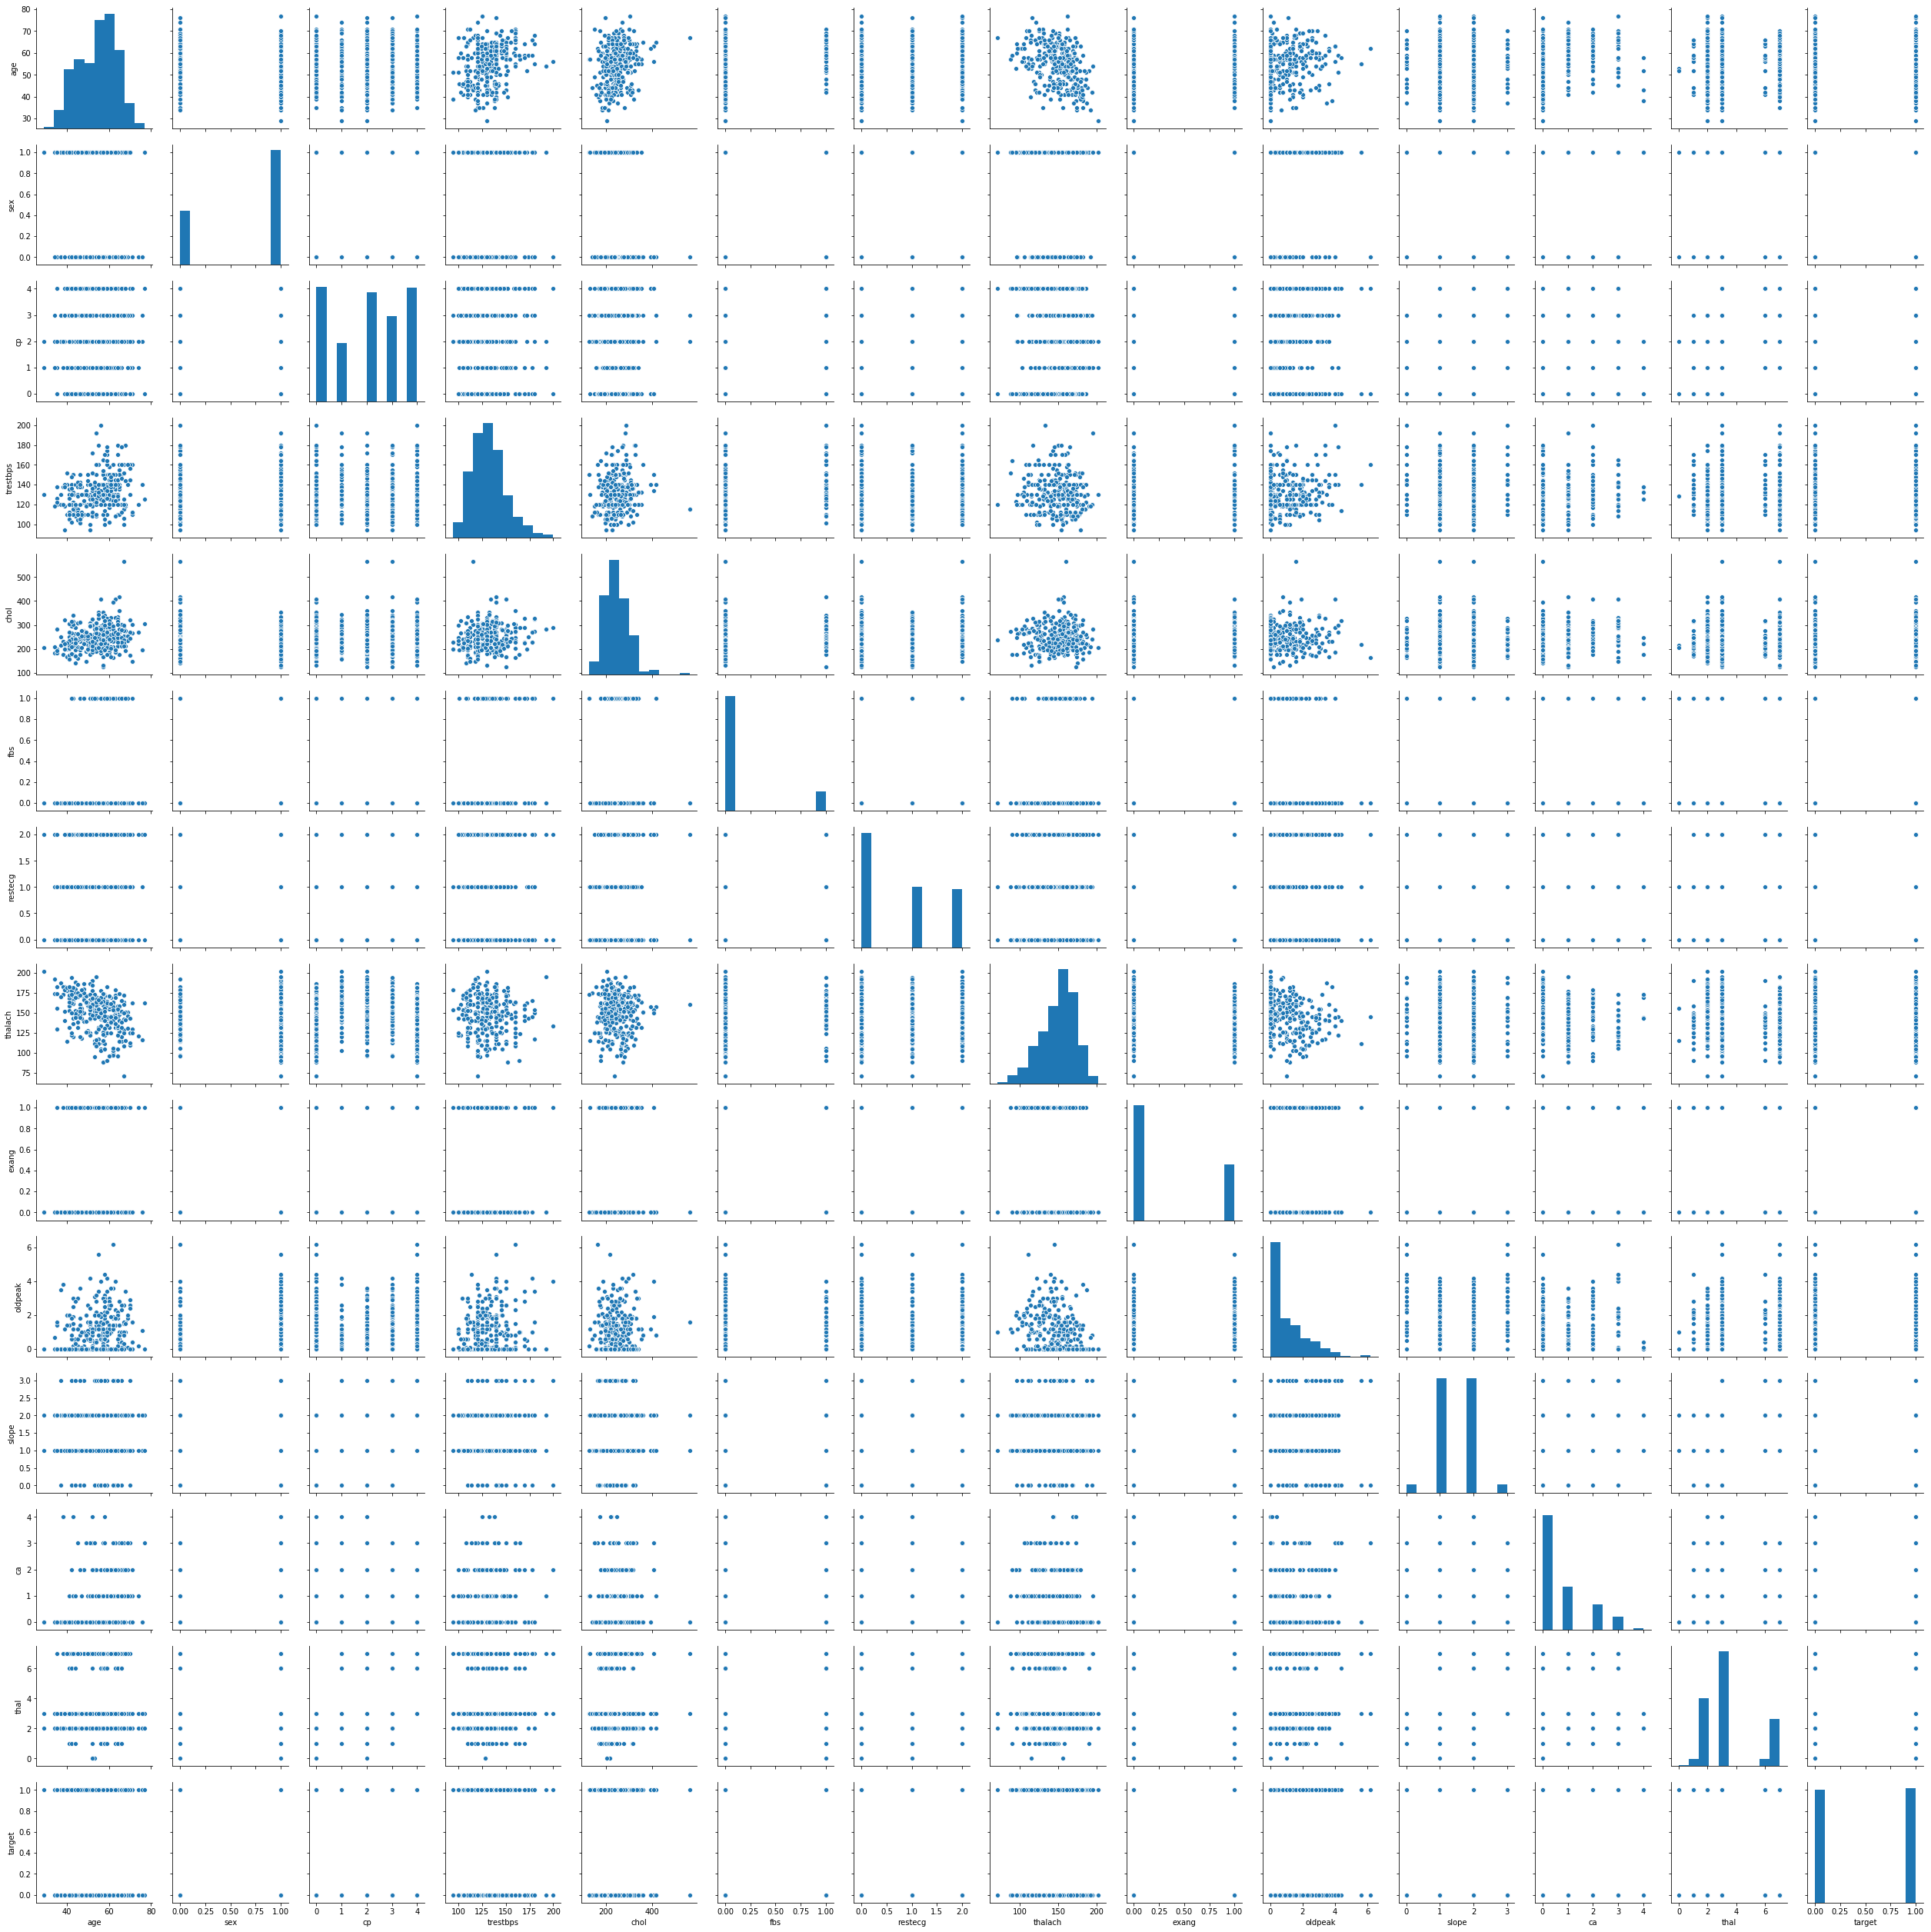

In [20]:
sns.pairplot(data)
plt.show()

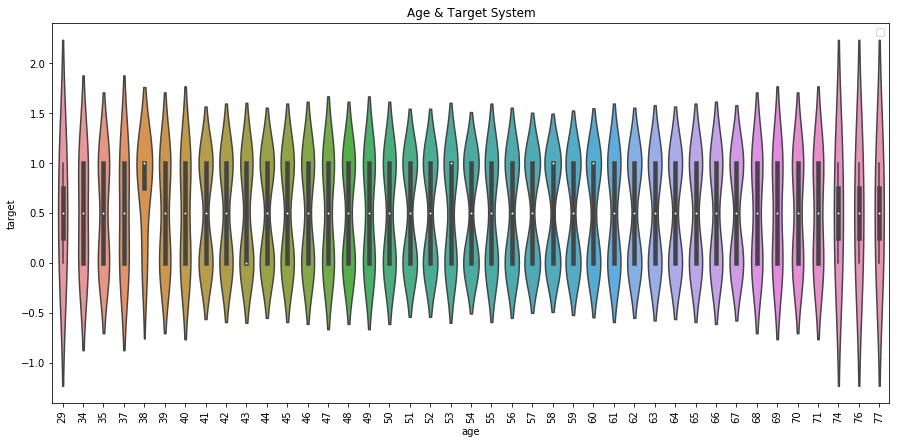

In [21]:
plt.figure(figsize=(15,7))
sns.violinplot(x=data.age,y=data.target)
plt.xticks(rotation=90)
plt.legend()
plt.title("Age & Target System")
plt.show()

In [22]:
data.cp.value_counts()

0    143
4    142
2    136
3    106
1     73
Name: cp, dtype: int64

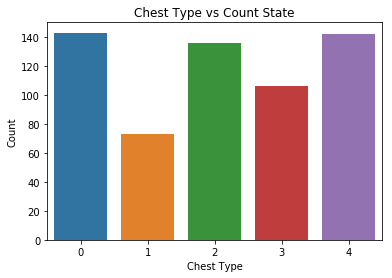

In [23]:
sns.countplot(data.cp)
plt.xlabel('Chest Type')
plt.ylabel('Count')
plt.title('Chest Type vs Count State')
plt.show()
#0 status at least
#1 condition slightly distressed
#2 condition medium problem
#3 condition bad
#4 condition too bad

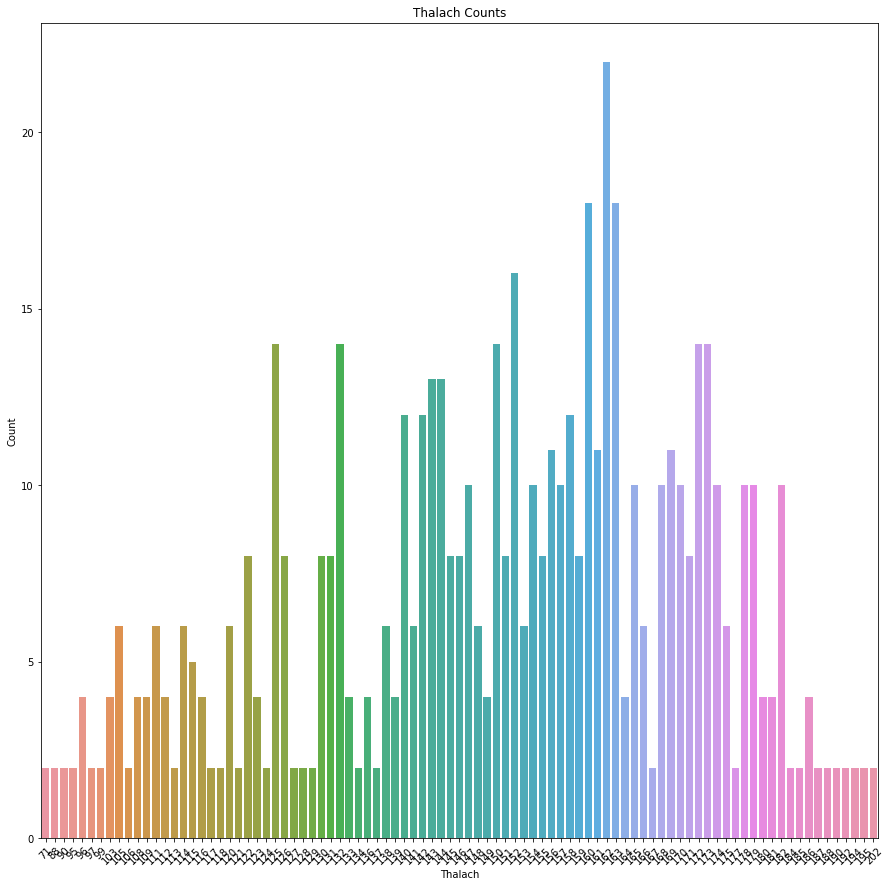

In [24]:
plt.figure(figsize=(15,15))
sns.barplot(x=data.thalach.value_counts().index,y=data.thalach.value_counts().values)
plt.xlabel('Thalach')
plt.ylabel('Count')
plt.title('Thalach Counts')
plt.xticks(rotation=45)
plt.show()

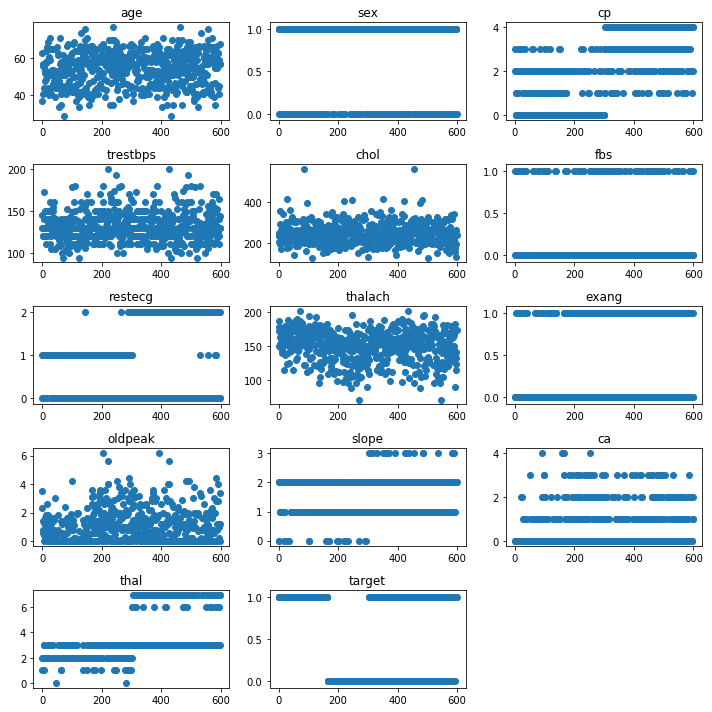

In [25]:
for i,col in enumerate(data.columns.values):
    plt.subplot(5,3,i+1)
    plt.scatter([i for i in range(600)],data[col].values.tolist())
    plt.title(col)
    fig,ax=plt.gcf(),plt.gca()
    fig.set_size_inches(10,10)
    plt.tight_layout()
plt.show()

In [26]:
#Let's see how the correlation values between them
data.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-9.550963e-02,0.018509,0.284879,0.208296,0.126533,0.054450,-0.396554,0.096641,0.203680,-4.717596e-03,0.316278,0.082173,-0.002544
sex,-0.095510,1.000000e+00,-0.019483,-0.061561,-0.198056,0.042013,-0.000346,-0.052195,0.142613,0.101251,-2.985349e-17,0.105787,0.227007,-0.002573
cp,0.018509,-1.948264e-02,1.000000,0.006102,0.004018,0.010979,0.244324,-0.006258,-0.017092,0.018326,2.098261e-01,-0.013536,0.548172,0.221353
trestbps,0.284879,-6.156130e-02,0.006102,1.000000,0.127358,0.179155,0.053564,-0.047900,0.067154,0.192238,-7.573091e-05,0.099542,0.082654,0.003629
chol,0.208296,-1.980563e-01,0.004018,0.127358,1.000000,0.012948,0.052958,-0.005055,0.063208,0.046390,-4.814485e-03,0.091659,0.028600,-0.003994
fbs,0.126533,4.201337e-02,0.010979,0.179155,0.012948,1.000000,0.012090,-0.008204,0.012590,0.006975,-7.543821e-03,0.144611,0.022955,-0.012186
restecg,0.054450,-3.460109e-04,0.244324,0.053564,0.052958,0.012090,1.000000,-0.029203,0.025984,0.050958,1.550737e-01,0.041717,0.193426,0.118959
thalach,-0.396554,-5.219531e-02,-0.006258,-0.047900,-0.005055,-0.008204,-0.029203,1.000000,-0.381564,-0.345900,1.516036e-03,-0.239172,-0.157343,0.002732
exang,0.096641,1.426125e-01,-0.017092,0.067154,0.063208,0.012590,0.025984,-0.381564,1.000000,0.288753,-5.690481e-03,0.130968,0.201334,-0.011751
oldpeak,0.203680,1.012509e-01,0.018326,0.192238,0.046390,0.006975,0.050958,-0.345900,0.288753,1.000000,-1.723049e-03,0.256216,0.215984,-0.007016


# Training

In [27]:
#dataX=data.drop('target',axis=1)
dataX=data[['cp','fbs','restecg','exang','slope','ca','thal']]
dataY=data['target']

In [28]:
dataX.describe()

,cp,fbs,restecg,exang,slope,ca,thal
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,2.051667,0.146667,0.760000,0.326667,1.500000,0.703333,3.510000
std,1.483014,0.354068,0.826764,0.469386,0.625021,0.981629,1.873254
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000
50%,2.000000,0.000000,1.000000,0.000000,1.500000,0.000000,3.000000
75%,3.000000,0.000000,1.250000,1.000000,2.000000,1.000000,3.000000
max,4.000000,1.000000,2.000000,1.000000,3.000000,4.000000,7.000000


In [29]:
dataY.describe()

count    600.000000
mean       0.503333
std        0.500406
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: target, dtype: float64

In [30]:
X_train,X_test,y_train,y_test=train_test_split(dataX,dataY,test_size=0.2,random_state=42)

In [31]:
# Normalize

X_train=(X_train-np.mean(X_train))/(np.max(X_train)).values
X_test=(X_test-np.mean(X_test))/(np.max(X_test)).values

## Logistic regression

This function implements logistic regression and can use different numerical optimizers to find parameters, including ‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’ solvers.****

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=1, solver='liblinear').fit(X_train,y_train)

yhat = LR.predict(X_test)
yhat_prob = LR.predict_proba(X_test)

jaccard index

In [33]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


0.625

confusion matrix

In [34]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[39 28]
 [17 36]]


Confusion matrix, without normalization
[[39 28]
 [17 36]]


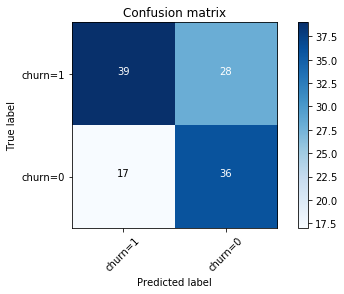

In [35]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

In [36]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.56      0.68      0.62        53
           1       0.70      0.58      0.63        67

    accuracy                           0.62       120
   macro avg       0.63      0.63      0.62       120
weighted avg       0.64      0.62      0.63       120



log loss

In [37]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.6622564737307186

In [38]:
LR2 = LogisticRegression(C=0.1, solver='sag').fit(X_train,y_train)
yhat_prob2 = LR2.predict_proba(X_test)
print ("LogLoss: : %.2f" % log_loss(y_test, yhat_prob2))

LogLoss: : 0.66


## SVM

The SVM algorithm offers a choice of kernel functions for performing its processing. Basically, mapping data into a higher dimensional space is called kernelling. The mathematical function used for the transformation is known as the kernel function, and can be of different types, such as:

     1.Linear
     2.Polynomial
     3.Radial basis function (RBF)
     4.Sigmoid

In [39]:
from sklearn import svm
clf = svm.SVC(kernel='rbf',C=1500)
clf.fit(X_train, y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1500, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [40]:
yhat = clf.predict(X_test)

In [41]:
from sklearn.metrics import accuracy_score

print ("FINISHED classifying. accuracy score : ")
print (accuracy_score(y_test, yhat))

FINISHED classifying. accuracy score : 
0.8333333333333334


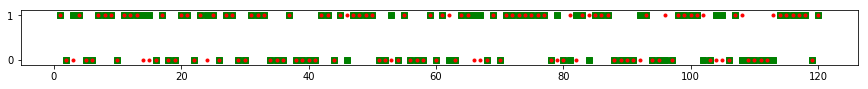

In [42]:
xx=np.arange(1,len(X_test)+1,1)
plt.figure(figsize=(15,1))
plt.scatter(xx,y_test,marker=',',color='g')  #, for square
plt.scatter(xx,yhat,marker='.', color='r')    # . for point
plt.show()

In [43]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [44]:
cnf_matrix = confusion_matrix(y_test, yhat, labels=[0,1])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()

              precision    recall  f1-score   support

           0       0.79      0.85      0.82        53
           1       0.87      0.82      0.85        67

    accuracy                           0.83       120
   macro avg       0.83      0.83      0.83       120
weighted avg       0.84      0.83      0.83       120



<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

Confusion matrix, without normalization
[[45  8]
 [12 55]]


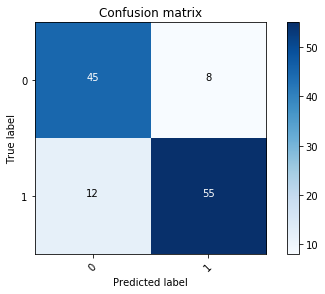

In [45]:
plot_confusion_matrix(cnf_matrix, classes=['0','1'],normalize= False,  title='Confusion matrix')

In [46]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted')

0.8337995337995338

In [47]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


0.8333333333333334

In [48]:
clf2 = svm.SVC(kernel='poly',C=1500)
clf2.fit(X_train, y_train) 
yhat2 = clf2.predict(X_test)
print("Avg F1-score: %.4f" % f1_score(y_test, yhat2, average='weighted'))
print("Jaccard score: %.4f" % jaccard_similarity_score(y_test, yhat2))

Avg F1-score: 0.6728
Jaccard score: 0.6750


/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


confirming again

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


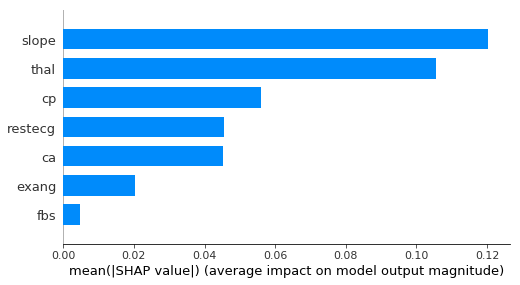

In [49]:
model = RandomForestClassifier(max_depth=5)
model.fit(X_train, y_train)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values[1], X_test, plot_type="bar")

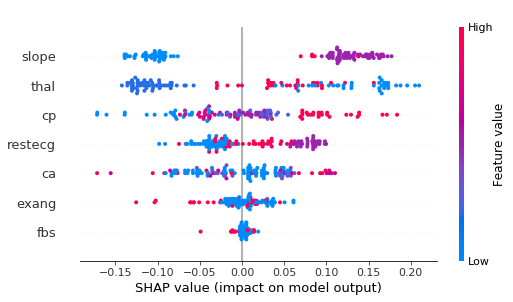

In [50]:
shap.summary_plot(shap_values[1], X_test)

In [51]:
def heart_disease_risk_factors(model, patient):

    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(patient)
    shap.initjs()
    return shap.force_plot(explainer.expected_value[1], shap_values[1], patient)

In [52]:
data_for_prediction = X_test.iloc[1,:].astype(float)
heart_disease_risk_factors(model, data_for_prediction)

In [53]:
data_for_prediction = X_test.iloc[3,:].astype(float)
heart_disease_risk_factors(model, data_for_prediction)

In [54]:
shap_values = explainer.shap_values(X_train.iloc[:120])
shap.force_plot(explainer.expected_value[1], shap_values[1], X_test.iloc[:120])

# Without Normalization

In [55]:
dataX=data[['cp','fbs','restecg','exang','slope','ca','thal']]
dataY=data['target']

In [56]:
X_train,X_test,y_train,y_test=train_test_split(dataX,dataY,test_size=0.2,random_state=42)

In [57]:
'''X_train=(X_train-np.min(X_train))/(np.max(X_train)-np.min(X_train)).values
X_test=(X_test-np.min(X_test))/(np.max(X_test)-np.min(X_test)).values'''

'X_train=(X_train-np.min(X_train))/(np.max(X_train)-np.min(X_train)).values\nX_test=(X_test-np.min(X_test))/(np.max(X_test)-np.min(X_test)).values'

In [58]:
LR = LogisticRegression(C=10, solver='liblinear').fit(X_train,y_train)
yhat = LR.predict(X_test)
yhat_prob = LR.predict_proba(X_test) # give probability

In [59]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


0.65

Confusion matrix, without normalization
[[49 18]
 [24 29]]


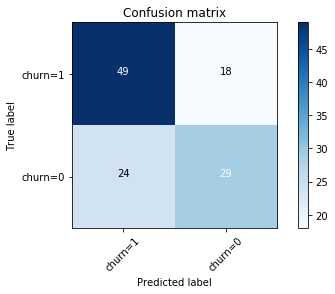

In [60]:
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

In [61]:
from sklearn import svm
clf = svm.SVC(kernel='rbf',C=1)
clf.fit(X_train, y_train)
yhat = clf.predict(X_test)
print (accuracy_score(y_test, yhat))

0.825


/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Confusion matrix, without normalization
[[54 13]
 [ 8 45]]


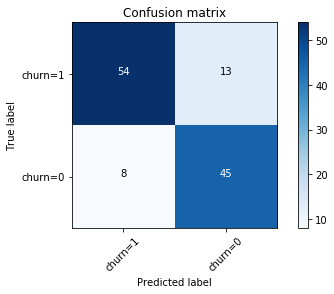

In [62]:
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

In [63]:
clf = svm.SVC(kernel='poly',C=100)
clf.fit(X_train, y_train)
yhat = clf.predict(X_test)
print (accuracy_score(y_test, yhat))

/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.7833333333333333


In [64]:
clf = svm.SVC(kernel='linear',C=1)
clf.fit(X_train, y_train)
yhat = clf.predict(X_test)
print (accuracy_score(y_test, yhat))

0.6583333333333333


In [65]:
clf.coef_

array([[ 1.70e-04, -1.30e-04,  1.27e-04, -6.27e-05,  2.00e+00,  1.74e-05,
        -9.40e-05]])

In [66]:
clf = svm.SVC(kernel='sigmoid',C=0.24)
clf.fit(X_train, y_train)
yhat = clf.predict(X_test)
print (accuracy_score(y_test, yhat))

0.6


/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


# Max-min Normalization

In [67]:
dataX=data[['cp','fbs','restecg','exang','slope','ca','thal']]
dataY=data['target']

In [68]:
X_train=(X_train-np.min(X_train))/(np.max(X_train)-np.min(X_train)).values
X_test=(X_test-np.min(X_test))/(np.max(X_test)-np.min(X_test)).values

In [69]:
LR = LogisticRegression(C=1, solver='liblinear').fit(X_train,y_train)
yhat = LR.predict(X_test)
jaccard_similarity_score(y_test, yhat)

/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


0.6666666666666666

In [70]:
clf = svm.SVC(kernel='sigmoid', C=1)
clf.fit(X_train, y_train)
yhat = clf.predict(X_test)
print (accuracy_score(y_test, yhat))

0.625


/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [71]:
clf = svm.SVC(kernel='linear',C=1)
clf.fit(X_train, y_train)
yhat = clf.predict(X_test)
print (accuracy_score(y_test, yhat))

0.6583333333333333


In [72]:
clf.coef_
clf.intercept_

array([-3.])

In [73]:
clf = svm.SVC(kernel='poly',C=300)
clf.fit(X_train, y_train)
yhat = clf.predict(X_test)
print (accuracy_score(y_test, yhat))

0.6916666666666667


/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [74]:
clf = svm.SVC(kernel='rbf',C=200)
clf.fit(X_train, y_train)
yhat = clf.predict(X_test)
print (accuracy_score(y_test, yhat))

0.825


/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Confusion matrix, without normalization
[[56 11]
 [10 43]]


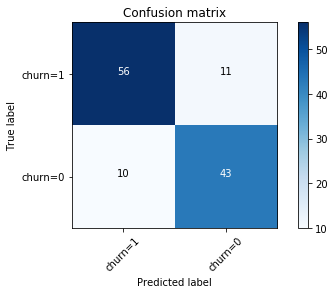

In [75]:
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

# Z-score Normalization

In [76]:
dataX=data[['cp','fbs','restecg','exang','slope','ca','thal']]
dataY=data['target']

In [77]:
X_train=(X_train-np.mean(X_train))/(np.std(X_train)).values
X_test=(X_test-np.mean(X_test))/(np.std(X_test)).values

In [78]:
clf = svm.SVC(kernel='rbf',C=1)
clf.fit(X_train, y_train)
yhat = clf.predict(X_test)
print (accuracy_score(y_test, yhat))

0.8333333333333334


Confusion matrix, without normalization
[[52 15]
 [ 5 48]]


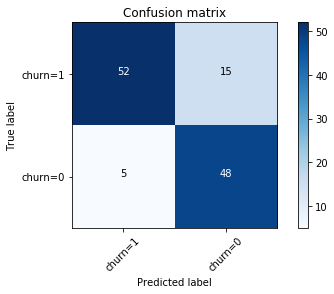

In [79]:
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

In [80]:
clf = svm.SVC(kernel='poly')
clf.fit(X_train, y_train)
yhat = clf.predict(X_test)
print (accuracy_score(y_test, yhat))

0.75


In [81]:
clf = svm.SVC(kernel='linear',C=1)
clf.fit(X_train, y_train)
yhat = clf.predict(X_test)
print (accuracy_score(y_test, yhat))

0.6583333333333333


In [82]:
clf = svm.SVC(kernel='sigmoid', C=0.1)
clf.fit(X_train, y_train)
yhat = clf.predict(X_test)
print (accuracy_score(y_test, yhat))

0.6583333333333333


## LR

In [83]:
LR = LogisticRegression(C=1, solver='liblinear').fit(X_train,y_train)
yhat = LR.predict(X_test)
jaccard_similarity_score(y_test, yhat)

/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


0.625

In [84]:
print(LR.coef_)
print(LR.intercept_)

[[ 0.3  -0.13  0.14 -0.04  0.7   0.1  -0.02]]
[-0.05]


### visualization of decision boundary

In [85]:
from sklearn.preprocessing import StandardScaler

In [86]:
clf = svm.SVC(kernel='rbf',C=1)
clf.fit(X_train, y_train)
yhat = clf.predict(X_test)
print (accuracy_score(y_test, yhat))

0.8333333333333334


In [87]:
'''def plot_contours(ax, kk, xx, yy, **params):
    Z = kk.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

def make_meshgrid(x, y, h=.1):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))#,
                         #np.arange(z_min, z_max, h))
    return xx, yy'''

'def plot_contours(ax, kk, xx, yy, **params):\n    Z = kk.decision_function(np.c_[xx.ravel(), yy.ravel()])\n    Z = Z.reshape(xx.shape)\n    out = ax.contourf(xx, yy, Z, **params)\n    return out\n\ndef make_meshgrid(x, y, h=.1):\n    x_min, x_max = x.min() - 1, x.max() + 1\n    y_min, y_max = y.min() - 1, y.max() + 1\n    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),\n                         np.arange(y_min, y_max, h))#,\n                         #np.arange(z_min, z_max, h))\n    return xx, yy'

In [88]:
# Pipeline Steps are StandardScaler, PCA and SVM 
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

pipe_steps = [('scaler', StandardScaler()), ('pca', PCA()), ('SupVM', SVC(kernel='rbf'))]

check_params= {
    'pca__n_components': [2], 
    'SupVM__C': [0.1, 0.5, 1, 10,30, 40, 50, 75, 100, 500, 1000], 
    'SupVM__gamma' : [0.001, 0.005, 0.01, 0.05, 0.07, 0.1, 0.5, 1, 5, 10, 50]
}

pipeline = Pipeline(pipe_steps)

NameError: name 'PCA' is not defined

In [89]:
from tqdm import tqdm_notebook as tqdm
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")



print ("Start Fitting Training Data")
for cv in tqdm(range(4,6)):
    create_grid = GridSearchCV(pipeline, param_grid=check_params, cv=cv)
    create_grid.fit(X_train, y_train)
    print ("score for %d fold CV := %3.2f" %(cv, create_grid.score(X_test, y_test)))
    print ("!!!!!!!! Best-Fit Parameters From Training Data !!!!!!!!!!!!!!")
    print (create_grid.best_params_)

print ("out of the loop")

Start Fitting Training Data


NameError: name 'pipeline' is not defined

In [90]:
from sklearn.decomposition import PCA
scaler1 = StandardScaler()
scaler1.fit(X_test)
X_test_scaled = scaler1.transform(X_test)


pca1 = PCA(n_components=2)
X_test_scaled_reduced = pca1.fit_transform(X_test_scaled)


svm_model = SVC(kernel='rbf', C=float(create_grid.best_params_['SupVM__C']), 
                gamma=float(create_grid.best_params_['SupVM__gamma']))

classify = svm_model.fit(X_test_scaled_reduced, y_test)

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

def make_meshgrid(x, y, h=.1):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))#,
                         #np.arange(z_min, z_max, h))
    return xx, yy

X0, X1 = X_test_scaled_reduced[:, 0], X_test_scaled_reduced[:, 1]
xx, yy = make_meshgrid(X0, X1)

fig, ax = plt.subplots(figsize=(12,9))
fig.patch.set_facecolor('white')
cdict1={0:'lime',1:'deeppink'}

Y_tar_list = y_test.tolist()
yl1= [int(target1) for target1 in Y_tar_list]
labels1=yl1
 
labl1={0:'No_disease',1:'disease'}
marker1={0:'*',1:'d'}
alpha1={0:.8, 1:0.5}

for l1 in np.unique(labels1):
    ix1=np.where(labels1==l1)
    ax.scatter(X0[ix1],X1[ix1], c=cdict1[l1],label=labl1[l1],s=70,marker=marker1[l1],alpha=alpha1[l1])

ax.scatter(svm_model.support_vectors_[:, 0], svm_model.support_vectors_[:, 1], s=40, facecolors='none', 
           edgecolors='navy')

plot_contours(ax, classify, xx, yy,cmap='seismic', alpha=0.4)
plt.legend(fontsize=15)


#plt.savefig('ClassifyMalignant_Benign2D_Decs_FunctG10.png', dpi=300)
plt.show()

NameError: name 'create_grid' is not defined

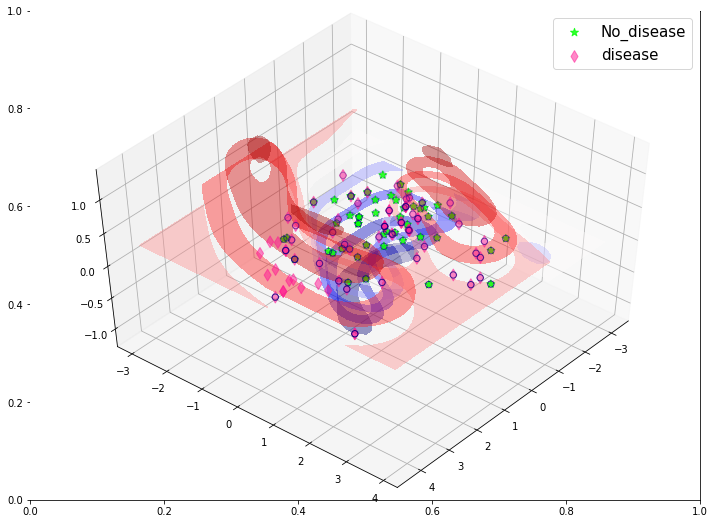

In [91]:
scaler1 = StandardScaler()
scaler1.fit(X_test)
X_test_scaled = scaler1.transform(X_test)


pca1 = PCA(n_components=2)
X_test_scaled_reduced = pca1.fit_transform(X_test_scaled)



svm_model = SVC(kernel='rbf', C=1., 
                gamma=.5)

classify = svm_model.fit(X_test_scaled_reduced, y_test)




from mpl_toolkits import mplot3d
from matplotlib import animation

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out
def make_meshgrid(x, y, h=.2):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
#    z_min, z_max = z.min() - 1, z.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))#,
    return xx, yy

X0, X1 = X_test_scaled_reduced[:, 0], X_test_scaled_reduced[:, 1]
xx, yy = make_meshgrid(X0, X1)

# print ("shape of X0: ", X0.shape)
# print ("shape of X1: ", X1.shape)

fig, ax1 = plt.subplots(figsize=(12,9))
ax1 = fig.gca(projection='3d')
ax1.view_init(50, 40)
fig.patch.set_facecolor('white')
cdict1={0:'lime',1:'deeppink'}

Y_tar_list = y_test.tolist()
yl1= [int(target1) for target1 in Y_tar_list]
labels1=yl1
 

labl1={0:'No_disease',1:'disease'}
marker1={0:'*',1:'d'}
alpha1={0:.8, 1:0.5}

def animate(k):
    ax1.view_init(elev=k, azim=40)
    
def plot3DBound():
    for l1 in np.unique(labels1):
        ix1=np.where(labels1==l1)
        ax1.scatter(X0[ix1],X1[ix1], c=cdict1[l1],label=labl1[l1],s=70,marker=marker1[l1],alpha=alpha1[l1])

    ax1.scatter(svm_model.support_vectors_[:, 0], svm_model.support_vectors_[:, 1], s=40, facecolors='none', 
              edgecolors='navy')    

    plot_contours(ax1, classify, xx, yy,cmap='seismic', alpha=0.4)
    '''plt.xlabel("1st Principal Component",fontsize=14)
    plt.ylabel("2nd Principal Component",fontsize=14)'''
    plt.legend(fontsize=15)
    return fig, 
    
ani = animation.FuncAnimation(fig, animate, init_func=plot3DBound, frames=300, interval=100, blit=False)
writer = animation.FFMpegFileWriter(fps=20, extra_args=['-vcodec', 'libx264'])
plt.show()
#ani.save('SVM3DBoundaryanim.mp4', writer=writer)